In [2]:
from __future__ import division

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader as pdr
pdr.get_data_fred('GS10')
#To grab stock data
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime as dt

# Performance of stocks over the last year

In [145]:
#Setting the end date to today
end = dt.datetime.now()
#Start date set to 1 year back
start = dt.datetime(end.year-1,end.month,end.day)

To find the performance of stocks over the last year, we can create a list with the stock names, for future looping.

In [209]:
stocks = ['TCS.NS','WIPRO.NS','INFY.NS','PERSISTENT.NS','COFORGE.NS','LT.NS','TECHM.NS','MPHASIS.NS','HCLTECH.NS','OFSS.NS']
#Using Yahoo Finance to grab the stock data
for stock in stocks:
    globals()[stock] =  web.DataReader(stock,'yahoo',start,end) #The globals method sets the stock name to a global variable

# Segment Composition of Sector Stocks

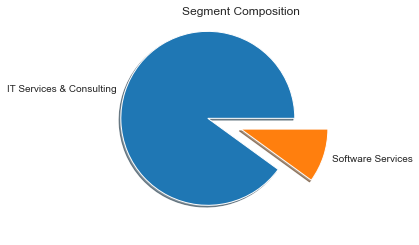

In [5]:
y = np.array([(9/10)*100, (1/10)*100])
mylabels = ["IT Services & Consulting", "Software Services"]
myexplode = [0.4, 0]
plt.title('Segment Composition')
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.show() 

# Detailed Analysis of TCS stock

In [220]:
TCS = web.DataReader('TCS.NS','yahoo',start,end)

### Yahoo Finance Live Stock Data

In [221]:
TCS.describe()

,High,Low,Open,Close,Volume,Adj Close
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,3184.026611,3120.299603,3152.655648,3151.452627,3.083093e+06,3135.563388
std,324.464772,319.072003,320.381549,323.100272,1.830061e+06,331.323921
min,2655.000000,2600.050049,2604.000000,2604.600098,9.903100e+05,2581.365234
25%,2970.512573,2915.500000,2946.099976,2930.224976,1.988245e+06,2904.175537
50%,3173.675049,3122.750000,3152.700073,3144.150024,2.675929e+06,3132.589722
75%,3309.037476,3253.775024,3275.000000,3274.049988,3.649020e+06,3267.369568
max,3981.750000,3892.100098,3930.000000,3954.550049,1.983933e+07,3954.550049


### Adjusted Closing Price of TCS stock over a year

<AxesSubplot:xlabel='Date'>

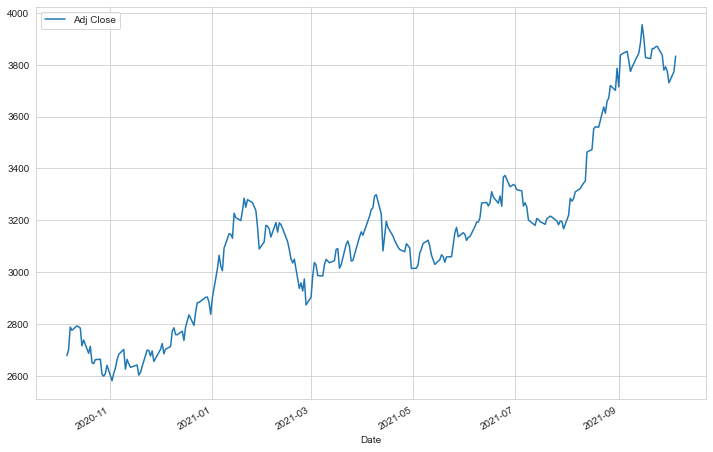

In [222]:
TCS['Adj Close'].plot(legend=True,figsize=(12,8))

### Volume of shares of TCS stock over a year

<AxesSubplot:xlabel='Date'>

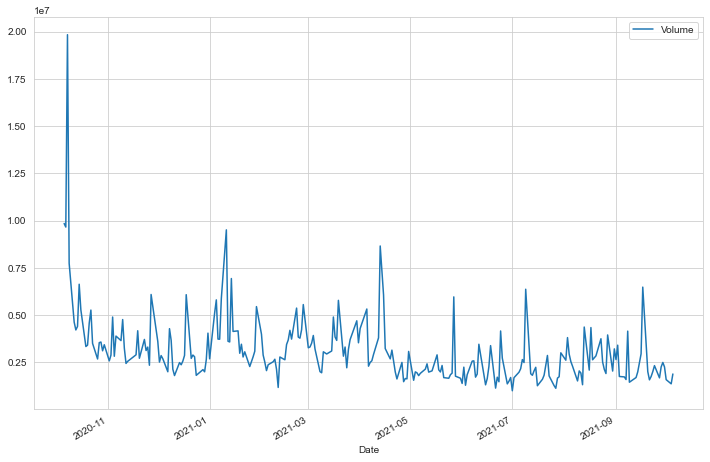

In [223]:
TCS['Volume'].plot(legend=True,figsize=(12,8))

### Moving Average of TCS stock for 10, 20, and 50 days

<AxesSubplot:xlabel='Date'>

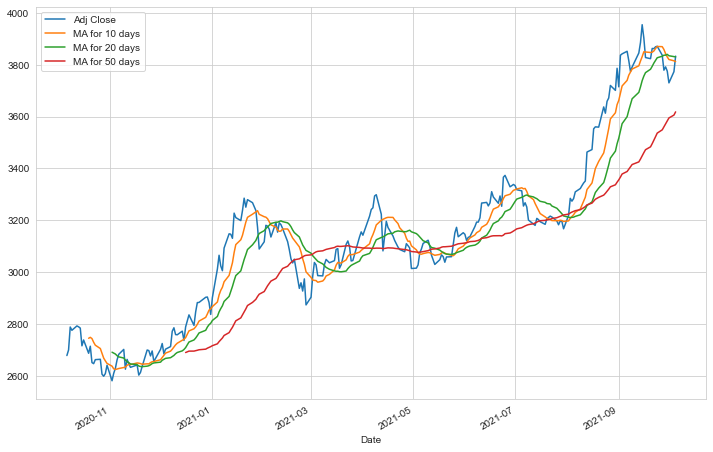

In [224]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    TCS[column_name] = TCS['Adj Close'].rolling(window=ma,center=False).mean()
    
TCS[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,8))

### Daily Return Average of TCS stock over a year

In [225]:
#The daily return column can be created by using the percentage change over the adjusted closing price
TCS['Daily Return'] = TCS['Adj Close'].pct_change()
TCS['Daily Return']

Date
2020-10-06         NaN
2020-10-07    0.007976
2020-10-08    0.032804
2020-10-09   -0.004512
2020-10-12    0.006061
                ...   
2021-09-29    0.003374
2021-09-30   -0.004312
2021-10-01   -0.012012
2021-10-04    0.011554
2021-10-05    0.015901
Name: Daily Return, Length: 248, dtype: float64

<AxesSubplot:xlabel='Date'>

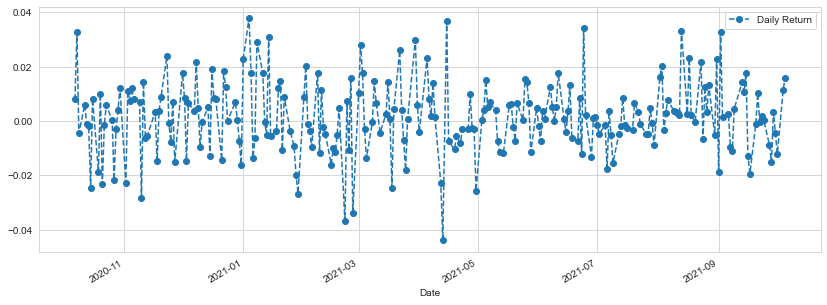

In [226]:
TCS['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

C:\Users\Adarshya\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

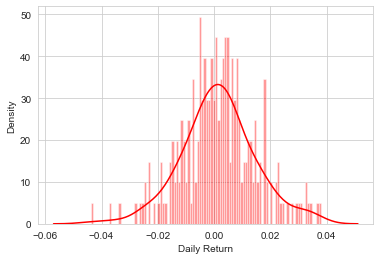

In [227]:
sns.distplot(TCS['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns.

# Closing Prices of IT stocks over time

<AxesSubplot:xlabel='Date'>

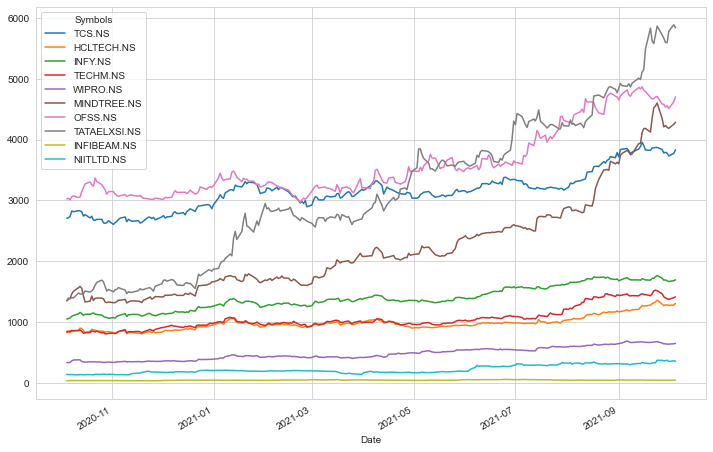

In [228]:
Close = df.Close
Close.plot(figsize=(12,8))

From the graph, it can be inferred that we've taken into account stocks that are from a variety of price an

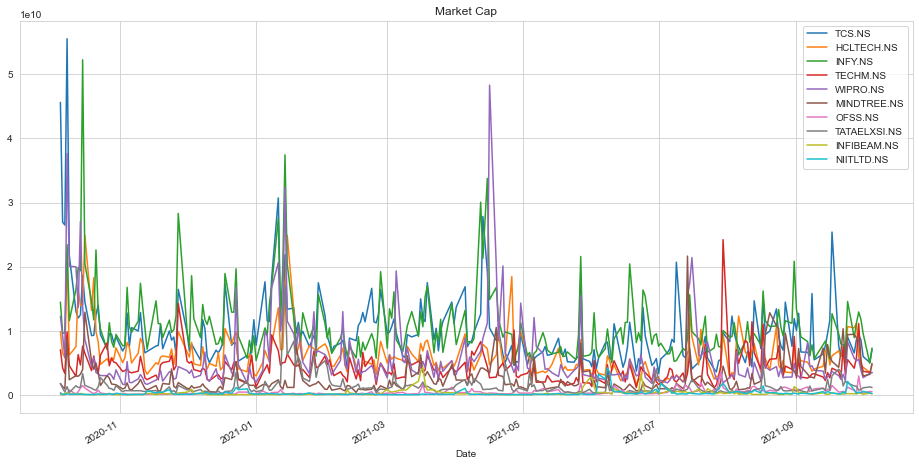

In [229]:
Open=df.Open
Volume=df.Volume
MarketCap = Open*Volume
MarketCap.plot(figsize=(16,8))
plt.title('Market Cap')
plt.legend()

In [230]:
m=[]
open_df_now = web.DataReader(stocks,'yahoo','2021-10-05','2021-10-05')['Open']
vol_df_now = web.DataReader(stocks,'yahoo','2021-10-05','2021-10-05')['Volume']
for stock in stocks:
    m.append(open_df_now[stock]*vol_df_now[stock])
print(m)

[Date
2021-10-05    7.049269e+09
Name: TCS.NS, dtype: float64, Date
2021-10-05    3.471863e+09
Name: WIPRO.NS, dtype: float64, Date
2021-10-05    7.305248e+09
Name: INFY.NS, dtype: float64, Date
2021-10-05    1.323989e+09
Name: PERSISTENT.NS, dtype: float64, Date
2021-10-05    1.366309e+09
Name: COFORGE.NS, dtype: float64, Date
2021-10-05    2.922069e+09
Name: LT.NS, dtype: float64, Date
2021-10-05    3.471797e+09
Name: TECHM.NS, dtype: float64, Date
2021-10-05    1.888517e+09
Name: MPHASIS.NS, dtype: float64, Date
2021-10-05    4.711750e+09
Name: HCLTECH.NS, dtype: float64, Date
2021-10-05    491585532.0
Name: OFSS.NS, dtype: float64]


# Correlation between pool of stocks

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

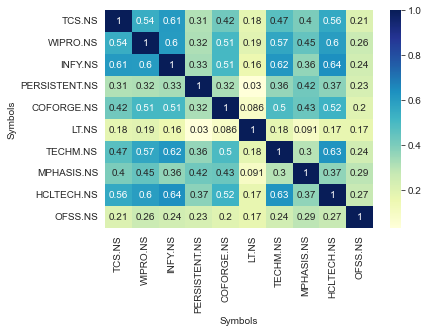

In [231]:
close_df = web.DataReader(stocks,'yahoo',start,end)['Adj Close']
rets_df = close_df.pct_change()
sns.heatmap(rets_df.corr(), cmap="YlGnBu",annot=True)

# Expected Return vs. Risk

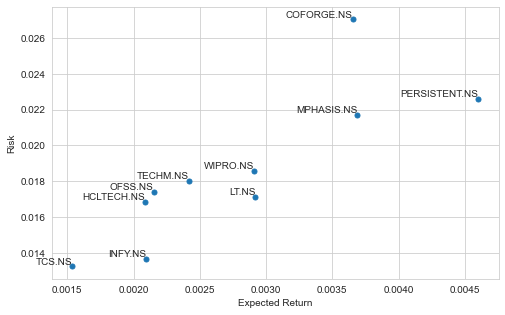

In [232]:
rets = rets_df.dropna()
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(0,0),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    )

In [233]:
rets['TCS.NS'].quantile(0.05)

-0.01964414414542438

In [234]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['TCS.NS']

sigma = rets.std()['TCS.NS']

#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [235]:
TCS['Open'].head()

Date
2020-10-06    2736.0
2020-10-07    2742.0
2020-10-08    2800.0
2020-10-09    2810.0
2020-10-12    2815.5
Name: Open, dtype: float64

Text(0.5, 1.0, 'Monte Carlo Analysis for TCS')

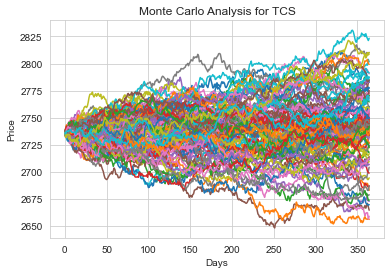

In [236]:
start_price = 2736.0 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for TCS')

Text(0.5, 1.0, 'Final price distribution for TCS Stock after 365 days')

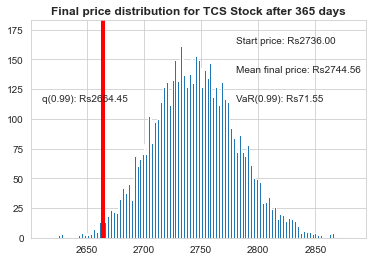

In [237]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: Rs%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: Rs%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): Rs%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): Rs%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for TCS Stock after %s days" %days, weight='bold')

TCS's stock is pretty stable. 
The starting price that we had was INR2736.00, and the average final price over 10,000 runs was INR2744.56.
The red line indicates the value of stock at risk at the desired confidence interval. 
For every stock, we'd be risking INR71.55, 99% of the time.

# Risk

In [239]:
initial_weight = np.array([0.1249,0.088,0.1055,0.0863,0.057,0.0898,0.105,0.0905,0.0928,0.1598])

Mean = df['Adj Close'].pct_change().mean()
allocated_daily_returns = (initial_weight * Mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)
return_stocks = df['Adj Close'].pct_change()
return_stocks['portfolio_daily_returns'] = return_stocks.dot(initial_weight)
return_stocks.head()


0.003082270780112535


Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS,portfolio_daily_returns
Date,,,,,,,,,,,
2020-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,0.003141,0.006006,0.006723,0.007311,-0.011678,0.016673,0.003241,0.034156,0.049461,-0.008385,0.009774
2020-10-07,0.007976,-0.001327,0.010230,-0.001239,0.015907,0.011844,-0.008586,-0.008365,0.049547,-0.016544,0.004118
2020-10-08,0.032804,0.025965,0.025456,0.016483,0.072025,0.052550,0.017188,0.014735,-0.014968,0.014579,0.023394
2020-10-09,-0.004512,0.007298,0.011978,-0.007149,0.040479,0.029497,0.004641,-0.005280,0.028054,-0.029477,0.003584


In [240]:
Cumulative_returns_daily = (1+return_stocks).cumprod()
Cumulative_returns_daily.tail(5)

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS,portfolio_daily_returns
Date,,,,,,,,,,,
2021-09-29,1.420040,1.594648,1.648600,1.735567,1.923014,3.174497,1.584978,4.183079,1.275026,2.656802,2.074501
2021-09-30,1.413917,1.592595,1.631989,1.717221,1.903056,3.150643,1.592774,4.180314,1.258289,2.738069,2.074985
2021-10-01,1.396934,1.585375,1.622199,1.705591,1.909509,3.139016,1.577496,4.321363,1.270461,2.571490,2.054167
2021-10-04,1.413074,1.591474,1.635448,1.740169,1.923914,3.190325,1.615952,4.401172,1.323714,2.657538,2.094756
2021-10-05,1.435544,1.624458,1.649135,1.757583,1.941321,3.214404,1.644200,4.364219,1.323714,2.596863,2.103506


<AxesSubplot:xlabel='Date'>

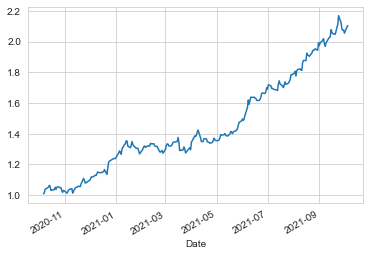

In [241]:
Cumulative_returns_daily['portfolio_daily_returns'].plot()

In [242]:
matrix_covariance_portfolio = return_stocks.iloc[:,:-1]
matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*252

matrix_covariance_portfolio

Symbols,TCS.NS,HCLTECH.NS,INFY.NS,TECHM.NS,WIPRO.NS,MINDTREE.NS,OFSS.NS,TATAELXSI.NS,INFIBEAM.NS,NIITLTD.NS
Symbols,,,,,,,,,,
TCS.NS,0.043988,0.031245,0.027553,0.028012,0.033628,0.038193,0.011867,0.019020,0.012956,0.014562
HCLTECH.NS,0.031245,0.071284,0.036942,0.047727,0.046906,0.058881,0.019888,0.026917,0.022485,0.033963
INFY.NS,0.027553,0.036942,0.046721,0.038045,0.038380,0.042156,0.014246,0.020987,0.012235,0.024804
TECHM.NS,0.028012,0.047727,0.038045,0.081581,0.047524,0.057001,0.018841,0.026045,0.018980,0.033008
WIPRO.NS,0.033628,0.046906,0.038380,0.047524,0.087007,0.059887,0.020948,0.033260,0.006648,0.027877
MINDTREE.NS,0.038193,0.058881,0.042156,0.057001,0.059887,0.128919,0.025757,0.039340,0.023316,0.028480
OFSS.NS,0.011867,0.019888,0.014246,0.018841,0.020948,0.025757,0.075831,0.015967,0.018892,0.018416
TATAELXSI.NS,0.019020,0.026917,0.020987,0.026045,0.033260,0.039340,0.015967,0.183477,0.001337,0.041331
INFIBEAM.NS,0.012956,0.022485,0.012235,0.018980,0.006648,0.023316,0.018892,0.001337,0.277336,0.009678


In [243]:
portfolio_variance = np.dot(initial_weight.T,np.dot(matrix_covariance_portfolio, initial_weight))

#standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.2005841973686122

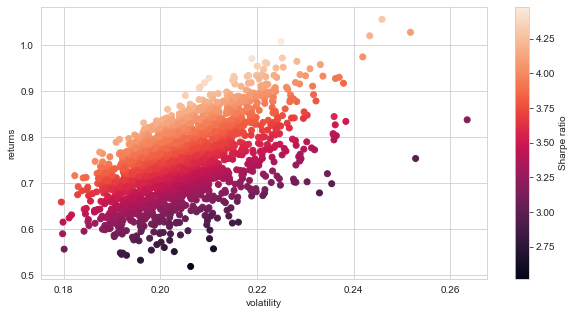

In [246]:
RF = 0
 
return_stocks = df['Close'].pct_change()

number_of_portfolios = 2000
RF = 0


portfolio_returns = []
portfolio_risk = []
sharpe_ratio_port = []
portfolio_weights = []

for portfolio in range (number_of_portfolios):
  #generate a w random weight of lengt of number of stocks
  weights = np.random.random_sample((len(stocks)))
 
  weights = weights / np.sum(weights)
  annualize_return = np.sum((return_stocks.mean() * weights) * 252)
  portfolio_returns.append(annualize_return)
  #variance
  matrix_covariance_portfolio = (return_stocks.cov())*252
  portfolio_variance = np.dot(weights.T,np.dot(matrix_covariance_portfolio, weights))
  portfolio_standard_deviation= np.sqrt(portfolio_variance) 
  portfolio_risk.append(portfolio_standard_deviation)
  #sharpe_ratio
  sharpe_ratio = ((annualize_return- RF)/portfolio_standard_deviation)
  sharpe_ratio_port.append(sharpe_ratio)

  portfolio_weights.append(weights)

portfolio_risk = np.array(portfolio_risk)
portfolio_returns = np.array(portfolio_returns)
sharpe_ratio_port = np.array(sharpe_ratio_port)

plt.figure(figsize=(10, 5))
plt.scatter(portfolio_risk, portfolio_returns, c=portfolio_returns / portfolio_risk) 
plt.xlabel('volatility')
plt.ylabel('returns')
plt.colorbar(label='Sharpe ratio')

porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 

portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)

In [245]:
porfolio_metrics = [portfolio_returns,portfolio_risk,sharpe_ratio_port, portfolio_weights] 
#from Python list we create a Pandas DataFrame
portfolio_dfs = pd.DataFrame(porfolio_metrics)
portfolio_dfs = portfolio_dfs.T
#Rename the columns:
portfolio_dfs.columns = ['Port Returns','Port Risk','Sharpe Ratio','Portfolio Weights']

#convert from object to float the first three columns.
for col in ['Port Returns', 'Port Risk', 'Sharpe Ratio']:
    portfolio_dfs[col] = portfolio_dfs[col].astype(float)
portfolio_dfs

,Port Returns,Port Risk,Sharpe Ratio,Portfolio Weights
0,0.788712,0.199263,3.958154,"[0.05729551810332577, 0.05341674123027279, 0.1..."
1,0.717866,0.190036,3.777532,"[0.09477016721769987, 0.05848814931787497, 0.1..."
2,0.727887,0.204775,3.554575,"[0.17168701367873634, 0.0776832298981103, 0.03..."
3,0.878068,0.207705,4.227486,"[0.10039057207023379, 0.010311970221213666, 0...."
4,0.695073,0.183715,3.783436,"[0.19603394782217712, 0.05518224584702294, 0.1..."
...,...,...,...,...
1995,0.800786,0.200502,3.993901,"[0.13885941040725705, 0.04771934164921779, 0.0..."
1996,0.871251,0.221331,3.936409,"[0.021654769817835283, 0.19933124096285906, 0...."
1997,0.654079,0.206506,3.167369,"[0.11934780288120564, 0.000807653021915103, 0...."
1998,0.822165,0.217941,3.772430,"[0.17055579262524667, 0.10364203504278058, 0.0..."


In [249]:
#portfolio with the highest Sharpe Ratio
Highest_sharpe_port = portfolio_dfs.iloc[portfolio_dfs['Sharpe Ratio'].idxmax()]
#portfolio with the minimum risk 
min_risk = portfolio_dfs.iloc[portfolio_dfs['Port Risk'].idxmin()]

#Highest_sharpe_port
print("Highest Sharpe Ratio")
print(Highest_sharpe_port)
print("")
print("Minimum Risk")
print(min_risk)

Highest Sharpe Ratio
Port Returns                                                  1.007547
Port Risk                                                     0.224979
Sharpe Ratio                                                  4.478395
Portfolio Weights    [0.02786490063515504, 0.015567023800554676, 0....
Name: 882, dtype: object

Minimum Risk
Port Returns                                                  0.659021
Port Risk                                                     0.179542
Sharpe Ratio                                                  3.670567
Portfolio Weights    [0.13325150527654284, 0.026487399277140625, 0....
Name: 846, dtype: object


In [251]:
print(Highest_sharpe_port['Portfolio Weights'])

[0.0278649  0.01556702 0.0530687  0.15713178 0.03341683 0.17268494
 0.10751142 0.29263945 0.05368149 0.08643347]


In [252]:
print(min_risk['Portfolio Weights'])

[0.13325151 0.0264874  0.16936541 0.11358532 0.0329521  0.02226877
 0.27376978 0.13173918 0.08109599 0.01548456]
